In [1]:
# Use API fredapi
from fredapi import Fred  # pip install fredapi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('classic')
%matplotlib inline

# GDP Definition

GDP: The monetary value of all finished goods and services made within a country during a specific period. GDP provides an economic snapshot of a country, used to estimate the size of an economy and growth rate

GDP-Business Sector: GDP contributed by sellers in the market for goods and services

GDP-Household Sector: GDP contribued by consumer

GDP-Government Sector: GDP contributed by governmental services

# Objective

Analysis of the change in the GDP and its three sub sectors change level before and after the epidemic

# Collecting Data

In [3]:
# Download GDP data
GDP= pd.read_csv('https://fred.stlouisfed.org/data/GDP.txt',skiprows=18,sep='\s+',index_col=0,parse_dates = True)

# set GDP data equal to 'VALUE' column of GDP
GDP_data= GDP['VALUE']

# Compute GDP Growth rate
GDP_growth = GDP_data/GDP_data.shift(1)-1

# Download GDP Business Sector data
GDP_business= pd.read_csv('https://fred.stlouisfed.org/data/A195RC1Q027SBEA.txt',skiprows=14,sep='\s+',index_col=0,parse_dates = True)

# set GDP business sector data equal to 'VALUE' column of GDP Business Sector 
GDP_business_data= GDP_business['VALUE']

# GDP Business Sector Increasing rate
GDP_Business_growth = GDP_business_data/GDP_business_data.shift(1)-1


# Download GDP Household Sector Data
GDP_household= pd.read_csv('https://fred.stlouisfed.org/data/A193RC1Q027SBEA.txt',skiprows=14,sep='\s+',index_col=0,parse_dates = True)

# set GDP Household sector data equal to 'VALUE' column of GDP Household
GDP_household_data= GDP_household['VALUE']

# GDP Household Increasing rate
GDP_Household_growth = GDP_household_data/GDP_household_data.shift(1)-1


# Download GDP Government Sector Data
GDP_Government= pd.read_csv('https://fred.stlouisfed.org/data/A765RC1Q027SBEA.txt',skiprows=14,sep='\s+',index_col=0,parse_dates = True)

# # set GDP government data equal to 'VALUE' column of GDP government Sector
GDP_Government_data= GDP_Government['VALUE']

# GDP Government Sector Increasing rate
GDP_Government_growth = GDP_Government_data/GDP_Government_data.shift(1)-1

# GDP and Annual Growth Rate over the past four years

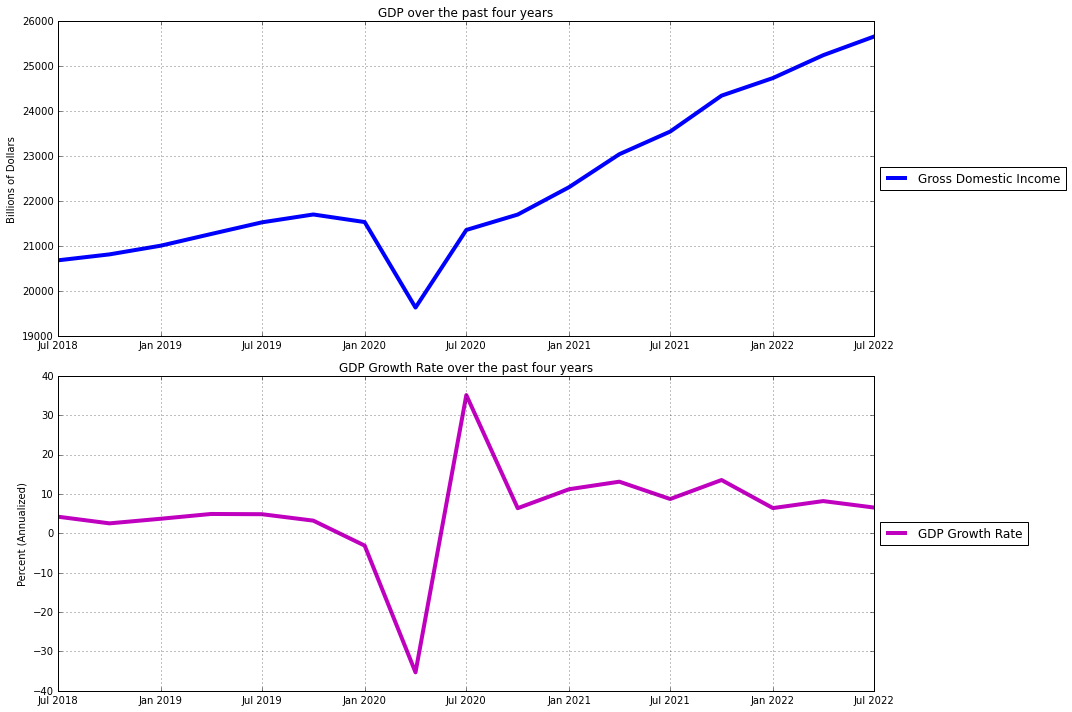

In [4]:
fig = plt.figure(figsize=(15,10))

# Auto-rotate the x-axis labels
fig.autofmt_xdate()


# Create axis 1 and plot with title
ax1 = fig.add_subplot(2,1,1)
ax1.plot(GDP_data[-17:],'b-',lw=4,label='Gross Domestic Income')
ax1.grid()

ax1.set_ylabel('Billions of Dollars')
ax1.set_title('GDP over the past four years')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))



ax2 = fig.add_subplot(2,1,2)
ax2.plot(100*4*GDP_growth [-17:],'m-',lw=4,label='GDP Growth Rate')
ax2.grid()
ax2.set_ylabel('Percent (Annualized)')
ax2.set_title('GDP Growth Rate over the past four years')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [5]:
# Compared GDP with 2020.4 to the other year's GDP 2019.4, 2021.4,and 2022.4 

#Difference between 2019.4 and 2020.4
print(round(GDP_data[-10]-GDP_data[-14],5))
#Difference between 2021.4 and 2020.4
print(round(GDP_data[-10]-GDP_data[-5],5))
#Difference between 2022.4 and 2020.4
print(round(GDP_data[-10]-GDP_data[-1],5))

-1635.717
-3913.689
-6026.558


In [38]:
# GDP_growth rate for 2020.4 (2020 first quarter)
print(round(100*4*GDP_growth [-10],5))

-35.31058


In [37]:
# GDP_growth rate for 2020.7 (2020 Second quarter)
print(round(100*4*GDP_growth [-9],5))

35.15243


In [9]:
# Compared GDP's annual growth rate between the period 2018.7-2020.4

# GDP average growth rate
print(round(100*4*GDP_growth [-17:-10].mean(),5))


# Compared GDP‘s annual growth rate between the period 2020.7-2022.7

# GDP average growth rate
print(round(100*4*GDP_growth [-9:].mean(),5))

2.92467
12.16078


# Comparison between GDP three major sectors: Business, Household, and Government growth rate over the past four years

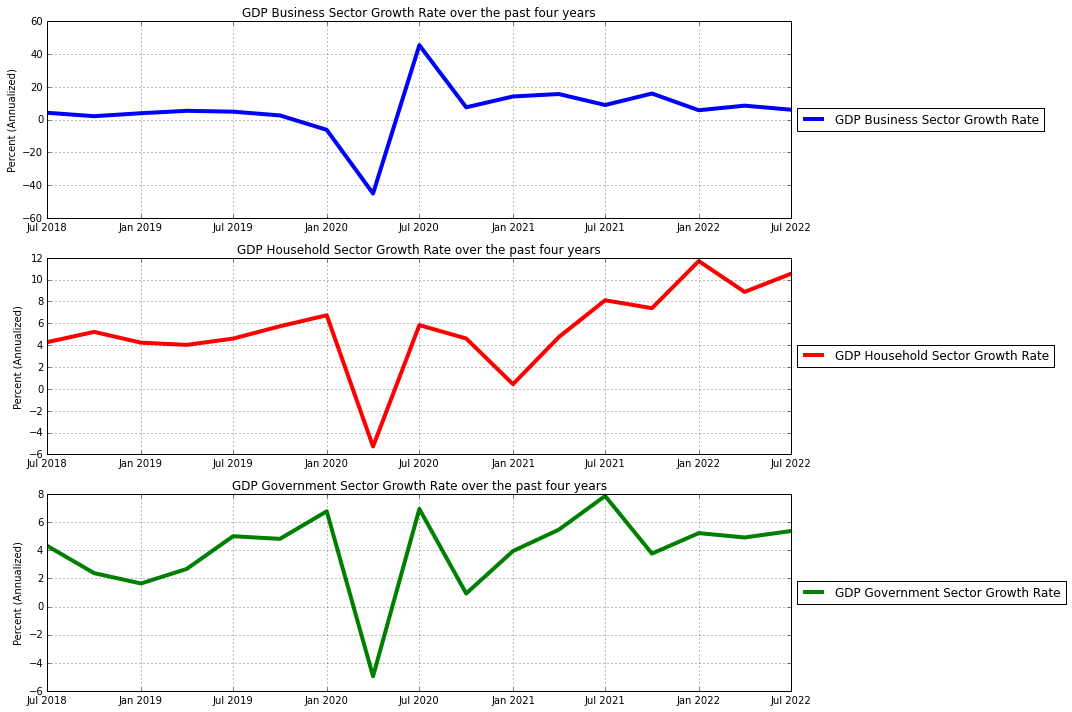

In [10]:
fig = plt.figure(figsize=(15,10))


# Create axis 1 and plot with title
ax1 = fig.add_subplot(3,1,1)
ax1.plot(100*4*GDP_Business_growth[-17:],'b-',lw=4,label='GDP Business Sector Growth Rate')
ax1.grid()
ax1.set_ylabel('Percent (Annualized)')
ax1.set_title('GDP Business Sector Growth Rate over the past four years')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Create axis 2 and plot with title
ax2 = fig.add_subplot(3,1,2)
ax2.plot(100*4*GDP_Household_growth[-17:],'r-',lw=4,label='GDP Household Sector Growth Rate')
ax2.grid()
ax2.set_ylabel('Percent (Annualized)')
ax2.set_title('GDP Household Sector Growth Rate over the past four years')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Create axis 3 and plot with title
ax3 = fig.add_subplot(3,1,3)
ax3.plot(100*4*GDP_Government_growth[-17:],'g-',lw=4,label='GDP Government Sector Growth Rate')
ax3.grid()
ax3.set_ylabel('Percent (Annualized)')
ax3.set_title('GDP Government Sector Growth Rate over the past four years')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Improve the spacing between the plots
plt.tight_layout()


In [36]:
# Compared average GDP three sector's average annual growth rate after the 2020 first quarter until 2022.7

print(round(100*4*GDP_Business_growth [-9:].mean(),5))
print(round(100*4*GDP_Household_growth [-9:].mean(),5))
print(round(100*4*GDP_Government_growth [-9:].mean(),5))

14.25486
6.9148
4.94184


# Unemployment Rate Definition

Unemployment Rate: The percentage of the population level that are actively looking for work

Participation Rate: The percentage of the population level that work or are actively looking for work

Employment-Population Ratio: The percentage of the population level that work

# Objective

The objective is to analyze the trend of unemployment rate before and after the epidemic

# Collecting Data

In [14]:
# Create account with FRED and get an API key
fred = Fred(api_key='5e3c6e87672056da772dcad79d489659')

# Set observation start date
observation_start = '2018-7-1'

In [15]:
# Get the unemployment rate data
unrate = fred.get_series('UNRATE', observation_start)

# Get the partcipation rate data
partrate = fred.get_series('CIVPART', observation_start)

# Get the employment to population ratio data 
emratio = fred.get_series('EMRATIO', observation_start)

# Get the inflation, consumer prices rate data
cpi = fred.get_series('CPIAUCSL', observation_start)

# Visualizing Data

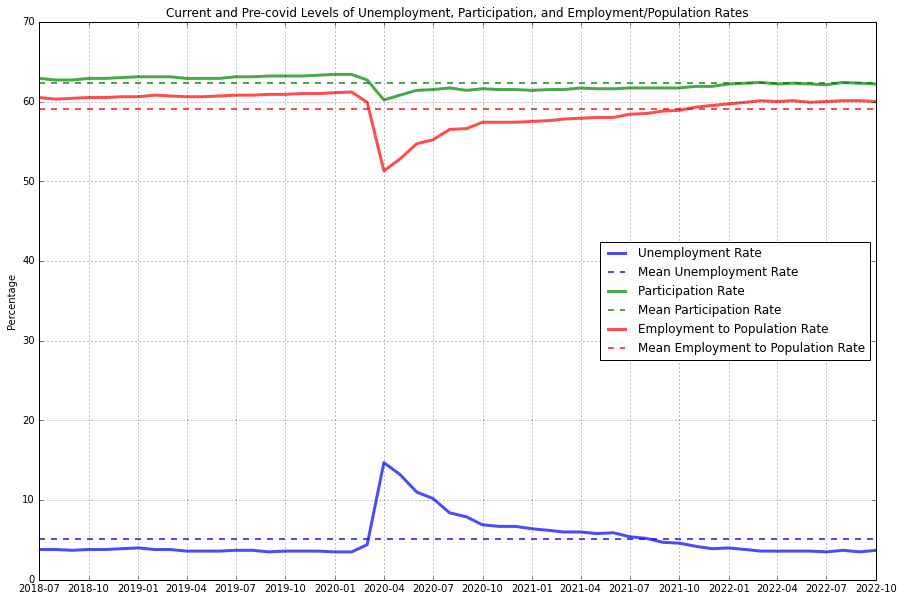

In [16]:
# Current and pre-pandemic levels of Unemployment, Participation and Employment/Population rates
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.plot(unrate, 'b-', lw=3, alpha = 0.7, label='Unemployment Rate')
ax.axhline(unrate.mean(), ls='--', c='b', lw=2, alpha = 0.7, label='Mean Unemployment Rate')
ax.plot(partrate, 'g-', lw=3, alpha = 0.7, label='Participation Rate')
ax.axhline(partrate.mean(), ls='--', c='g', lw=2, alpha = 0.7, label='Mean Participation Rate')
ax.plot(emratio, 'r-', lw=3, alpha = 0.7, label='Employment to Population Rate')
ax.axhline(emratio.mean(), ls='--', c='r', lw=2, alpha = 0.7, label='Mean Employment to Population Rate')
ax.set_title('Current and Pre-covid Levels of Unemployment, Participation, and Employment/Population Rates')
ax.set_ylabel('Percentage')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.legend(loc='center right')
ax.grid()

# Analyzing Data

In [17]:
print('Minimum of participation rate: ' + str(partrate.min()) + '%')
print('Year: ' + str(partrate.idxmin()))
print('Maximum of participation rate: ' + str(partrate.max()) + '%')
print('Year: ' + str(partrate.idxmax()))
print('Largest decline: ' + str(partrate.max()-partrate.min()) + '%')
print('Maximum of unemployment rate: ' + str(unrate.max()) + '%')
print('Mean of unemployment rate: ' + str(unrate.mean()) + '%')

Minimum of participation rate: 60.2%
Year: 2020-04-01 00:00:00
Maximum of participation rate: 63.4%
Year: 2020-01-01 00:00:00
Largest decline: 3.1999999999999957%
Maximum of unemployment rate: 14.7%
Mean of unemployment rate: 5.0942307692307685%


# Consumer Loans Definition

Compare the consumer loans trend before and after the Covid pandemic and interpret possible reason behind the feature of the trend

# Objective

Analysis of the change in the Consumer loans before and after the epidemic, and the impact of the consumer Loans on inflation during this period

# Collecting Data

In [29]:
consumer_loans = pd.read_csv('https://fred.stlouisfed.org/data/CCLACBW027SBOG.txt',skiprows=12,index_col=0,sep= '\s+',parse_dates=True)

# Visualizing Data

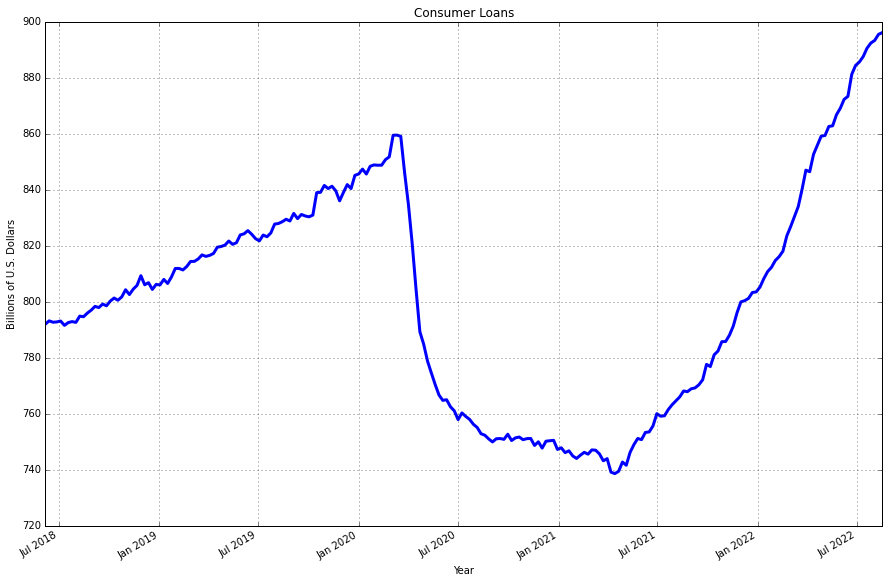

In [30]:
consumer_loans = consumer_loans['VALUE']
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.plot(consumer_loans[-230:-10],'-',lw=3)
ax.set_xlabel('Year')
ax.set_ylabel('Billions of U.S. Dollars')
ax.grid()
ax.set_title('Consumer Loans')
fig.autofmt_xdate()
fig.savefig('consumer_loans.png',dpi = 120)

# Federal Funds Rate Definition

The Federal Funds Rate is the interest rate at which depository institutions lend reserve balances to other depository institutions overnight on an uncollateralized basis

# Objective

Analysis of the change in the Federal funds rate before and after the epidemic, and the impact of the Federal Funds Rate on inflation during this period

# Collecting Data

In [33]:
# Download GDP data
interest = pd.read_csv('https://fred.stlouisfed.org/data/DFF.txt',skiprows=66,sep='\s+',index_col=0,parse_dates = True)

interest_data = interest['VALUE']

# Visualizing Data

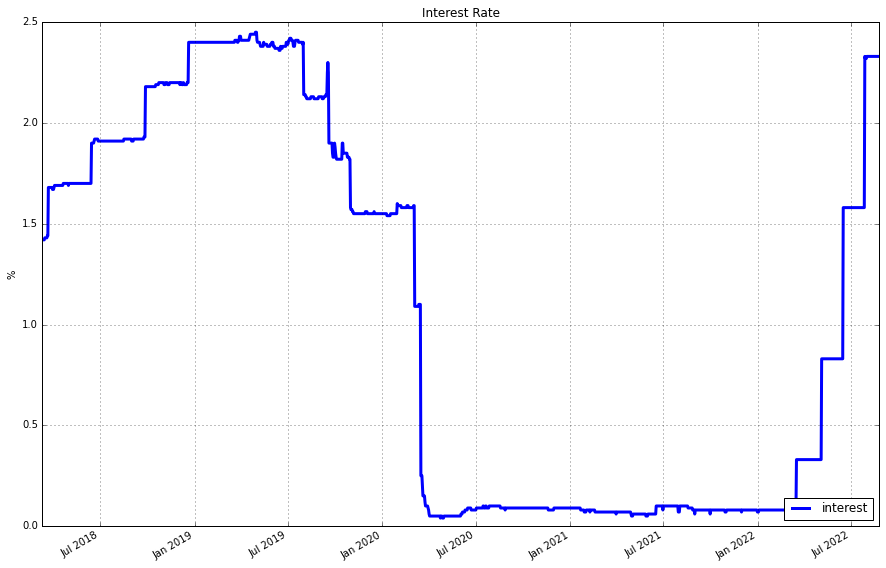

In [35]:
# Create figure and axis
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)

# Plot
ax.plot(interest_data[-1700:-70],'-',lw=3,label='interest')

# Add title and y-axis label
ax.set_title('Interest Rate')
ax.set_ylabel('%')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

ax.grid()
ax.legend(loc='lower right')